## Table of Contents:
#### 01. Importing the libraries
#### 02. Importing the latest dataset
#### 03. Addressing PII data
#### 04. Creating a regional segmentation of the data
#### 05. Creating an exclusion flag for the low-activity customers (less than 5 orders)
#### 06. Customer Profiling based on AGE
#### 07. Customer Profiling based on INCOME
#### 08. Customer Profiling based on 'CANNED GOODS' users
#### 09. Customer profiling based on NUMBER OF DEPENDANTS
#### 10. Exporting the final Dataframe

## 01. Importing the libraries

In [1]:
# importing the libraries for analysis & visualization

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Importing the latest dataset

In [2]:
# defining the path

path=r'/Users/sanju/Documents/Jul 2023 Instacart Basket Analysis'

In [3]:
# importing the latest 'ords_prods_cust_merged.pkl' dataset

df_latest=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cust_merged.pkl'))

In [4]:
# checking the dataframe

df_latest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int32   
 1   First Name              object  
 2   surname                 object  
 3   Gender                  object  
 4   state                   object  
 5   Age                     int8    
 6   date_joined             object  
 7   no_of_dependants        int8    
 8   fam_status              object  
 9   income                  int32   
 10  order_id                int32   
 11  order_number            int8    
 12  orders_day_of_week      int8    
 13  order_hour_of_day       int8    
 14  days_since_prior_order  float16 
 15  product_id              int32   
 16  add_to_cart_order       int32   
 17  reordered               int8    
 18  _merge                  category
 19  product_name            object  
 20  aisle_id                int16   
 21  depart

## 03. Addressing PII data

In [5]:
# dropping the 'First Name' and 'surname' columns due to PII

df_latest=df_latest.drop(columns=['First Name','surname'])

In [6]:
# checking the result

pd.options.display.max_columns=None
df_latest.head()

,user_id,Gender,state,Age,date_joined,no_of_dependants,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_order_days,order_frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,both,Soda,77,7,9.0,Mid-range product,Regularly Busy,Busiest Day,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly Busy,Regularly Busy,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,both,Soda,77,7,9.0,Mid-range product,Regularly Busy,Busiest Day,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly Busy,Regularly Busy,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly Busy,Least Busy,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer


## 04. Creating a regional segmentation of the data

In [7]:
# creating the loop

region=[]
for value in df_latest['state']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Idaho','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']:
        region.append('West')
    else:
        region.append('South')

In [8]:
# combining the above loop with the dataframe & creating a new column

df_latest['region']=region

In [9]:
# checking the result

pd.options.display.max_columns=None
df_latest.head()

,user_id,Gender,state,Age,date_joined,no_of_dependants,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_order_days,order_frequency_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,both,Soda,77,7,9.0,Mid-range product,Regularly Busy,Busiest Day,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly Busy,Regularly Busy,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,both,Soda,77,7,9.0,Mid-range product,Regularly Busy,Busiest Day,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly Busy,Regularly Busy,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly Busy,Least Busy,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer,Midwest


In [10]:
# checking the spending habits between the regions (crossing 'region' with 'spending flag')

spending_habit=pd.crosstab(df_latest['region'],df_latest['spending_flag'],dropna=False)

In [11]:
spending_habit

spending_flag,High spender,Low spender
region,,
Midwest,141516,6824881
Northeast,108225,5614511
South,232970,11825108
West,151534,7506114


Text(0.5, 1.0, 'Regional Spending Habit')

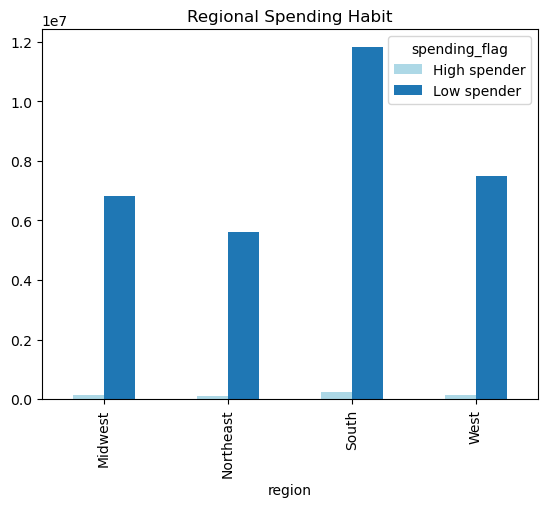

In [12]:
# creating a bar chart of the above 'spending_habit' table

spending_habit_viz=spending_habit.plot.bar(color=['lightblue','tab:blue'])
plt.title('Regional Spending Habit')

In [13]:
# exporting the above visualization

spending_habit_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','regional_spending_habit.png'),bbox_inches='tight')

## 05. Creating an exclusion flag for the low-activity customers (less than 5 orders)

In [14]:
# checking the shape of the 'df_latest' dataframe

df_latest.shape

(32404859, 32)

In [15]:
# creating a new column for low-activity customers (less than 5 orders)

df_latest.loc[df_latest['max_order']>=5,'customer_activity']='High-activity Customer'

In [16]:
df_latest.loc[df_latest['max_order']<5,'customer_activity']='Low-activity Customer'

In [17]:
# checking the result

df_latest['customer_activity'].value_counts(dropna=False)

High-activity Customer    30964564
Low-activity Customer      1440295
Name: customer_activity, dtype: int64

In [18]:
# creating a subset of the Low-activity customers

low_activity_cust=df_latest[df_latest['customer_activity']=='Low-activity Customer']

In [19]:
# checking the shape

low_activity_cust.shape

(1440295, 33)

In [20]:
# exporting the Low-activity customers subset

low_activity_cust.to_pickle(os.path.join(path,'02 Data','Prepared Data','Low_activity_customers.pkl'))

In [21]:
# creating a subset for the High-activity customers

high_activity_cust=df_latest[df_latest['customer_activity']=='High-activity Customer']

In [22]:
# checking the shape

high_activity_cust.shape

(30964564, 33)

In [23]:
# exporting the High-activity customers subset

high_activity_cust.to_pickle(os.path.join(path,'02 Data','Prepared Data','High_activity_customers.pkl'))

## 06. Customer Profiling based on AGE

In [24]:
# checking the size of the 'df_latest' dataframe

df_latest.shape

(32404859, 33)

In [25]:
# creating a flag as per age groups

df_latest.loc[df_latest['Age']<35,'age_group']='Young Age'

In [26]:
df_latest.loc[(df_latest['Age']>=35) & (df_latest['Age']<60),'age_group']='Middle Age'

In [27]:
df_latest.loc[df_latest['Age']>=60,'age_group']='Old Age'

In [28]:
df_latest['age_group'].value_counts(dropna=False)

Middle Age    12709949
Old Age       11067255
Young Age      8627655
Name: age_group, dtype: int64

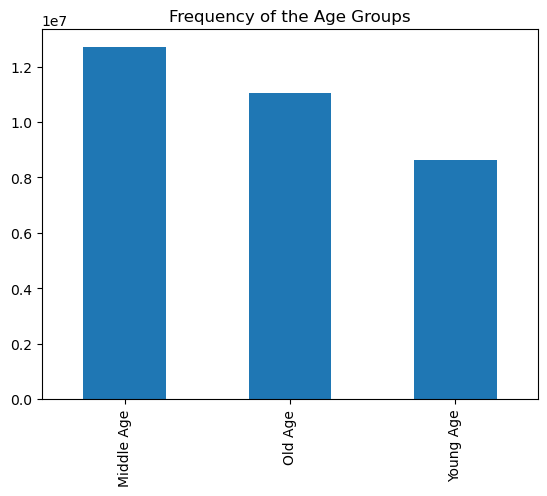

In [29]:
# creating a visualization

age_grp_bar=df_latest['age_group'].value_counts().plot.bar(title='Frequency of the Age Groups')

In [30]:
# exporting the visualization

age_grp_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_groups_bar.png'),bbox_inches='tight')

In [31]:
df_latest.head()

,user_id,Gender,state,Age,date_joined,no_of_dependants,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_order_days,order_frequency_flag,region,customer_activity,age_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,both,Soda,77,7,9.0,Mid-range product,Regularly Busy,Busiest Day,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity Customer,Middle Age
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly Busy,Regularly Busy,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity Customer,Middle Age
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,both,Soda,77,7,9.0,Mid-range product,Regularly Busy,Busiest Day,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity Customer,Middle Age
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly Busy,Regularly Busy,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity Customer,Middle Age
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,both,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly Busy,Least Busy,Most orders,8,New Customer,7.988889,Low spender,19.0,Regular customer,Midwest,High-activity Customer,Middle Age


In [32]:
# checking 'age_group' with region

age_region=pd.crosstab(df_latest['region'],df_latest['age_group'],dropna=False)

In [33]:
age_region

age_group,Middle Age,Old Age,Young Age
region,,,
Midwest,2774232,2342470,1849695
Northeast,2214091,1973103,1535542
South,4684644,4146803,3226631
West,3036982,2604879,2015787


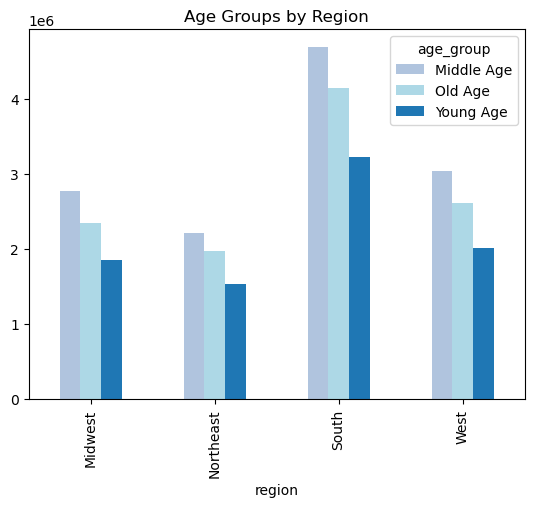

In [34]:
# visualizing the above 'age_region' crosstab with a bar chart

age_region_bar=age_region.plot.bar(title='Age Groups by Region',color=['lightsteelblue','lightblue','tab:blue'])

In [35]:
# exporting the above 'age_region_bar' visualization

age_region_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_region.png'),bbox_inches='tight')

In [36]:
# checking 'age_group' with 'order_frequency_flag'

age_order_freq=pd.crosstab(df_latest['order_frequency_flag'],df_latest['age_group'],dropna=False)

In [37]:
age_order_freq

age_group,Middle Age,Old Age,Young Age
order_frequency_flag,,,
Frequent customer,8456692,7376677,5726484
Non-frequent customer,1427933,1241542,966967
Regular customer,2825324,2449036,1934204


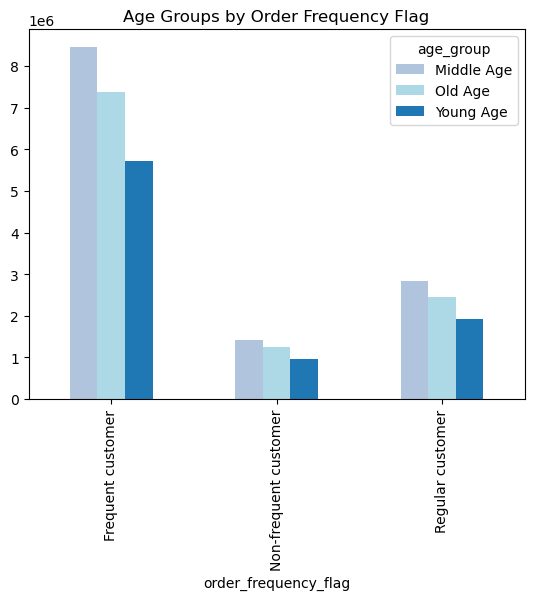

In [38]:
# visualizing the above 'age_order_freq' crosstab with a bar chart

age_order_freq_viz=age_order_freq.plot.bar(title='Age Groups by Order Frequency Flag',color=['lightsteelblue','lightblue','tab:blue'])

In [39]:
# exporting the above 'age_order_freq_viz' visualization

age_order_freq_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_order_freq.png'),bbox_inches='tight')

In [40]:
# checking the 'age_group' with the 'spending_flag'

age_spending=pd.crosstab(df_latest['spending_flag'],df_latest['age_group'],dropna=False)

In [41]:
age_spending

age_group,Middle Age,Old Age,Young Age
spending_flag,,,
High spender,259896,216735,157614
Low spender,12450053,10850520,8470041


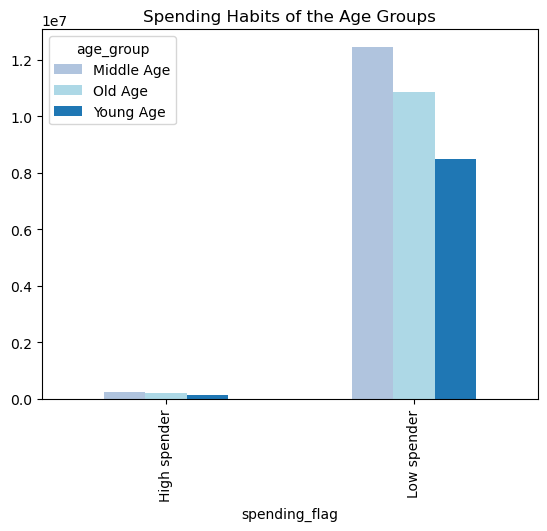

In [42]:
# creating a visualization of the above 'age_spending' crosstab with a bar chart

age_spending_viz=age_spending.plot.bar(title='Spending Habits of the Age Groups',color=['lightsteelblue','lightblue','tab:blue'])

In [43]:
# exporting the above 'age_spending_viz' visualization

age_spending_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_spending.png'),bbox_inches='tight')

In [44]:
# checking the 'age_group' with the 'order_hour_of_day'

age_hour_of_day=pd.crosstab(df_latest['order_hour_of_day'],df_latest['age_group'],dropna=False)

In [45]:
age_hour_of_day

age_group,Middle Age,Old Age,Young Age
order_hour_of_day,,,
0,86294,72606,59869
1,46100,38094,31506
2,26430,23601,19344
3,19367,17789,14125
4,19359,19233,14650
5,33549,30992,23420
6,111957,98623,79913
7,345033,308187,237834
8,675410,588280,454428


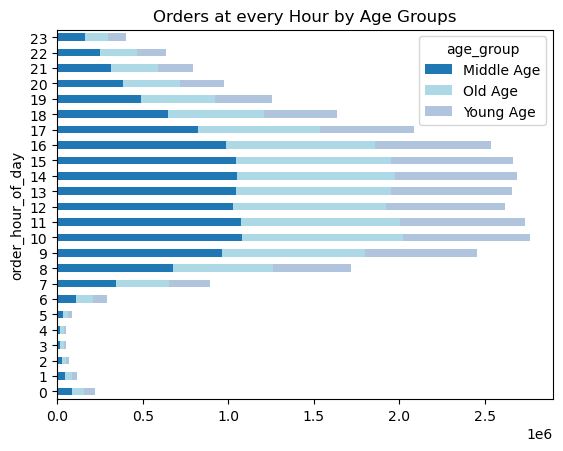

In [46]:
# visualizing the above 'age_hour_of_day' crosstab

age_hour_of_day_viz=age_hour_of_day.plot.barh(title='Orders at every Hour by Age Groups',color=['tab:blue','lightblue','lightsteelblue'],stacked=True)

In [47]:
# exporting the above visualization

age_hour_of_day_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_hour_of_day.png'),bbox_inches='tight')

In [48]:
# importing the 'department_wrangled.csv' dataset

df_dept=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','department_wrangled.csv'),index_col=False)

In [49]:
# renaming the 'unnamed: 0' column to 'department_id'

df_dept.rename(columns={'Unnamed: 0':'department_id'},inplace=True)

In [50]:
# checking the import

df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [51]:
# merging 'df_dept' dataframe with the 'df_latest' dataframe

df_latest_all=df_latest.merge(df_dept,on='department_id')

In [52]:
# creating a crosstab between 'department' and 'age_group'

age_dept=pd.crosstab(df_latest_all['department'],df_latest_all['age_group'],dropna=False)

In [53]:
age_dept

age_group,Middle Age,Old Age,Young Age
department,,,
alcohol,60411,50664,42621
babies,169798,142912,111092
bakery,459656,400020,312752
beverages,1056314,923708,708101
breakfast,275099,238897,189037
bulk,13468,11803,9302
canned goods,418429,363738,285891
dairy eggs,2115361,1838082,1445304
deli,412726,359502,279021


In [54]:
age_dept= age_dept.sort_values(by=['Middle Age'], ascending=True)

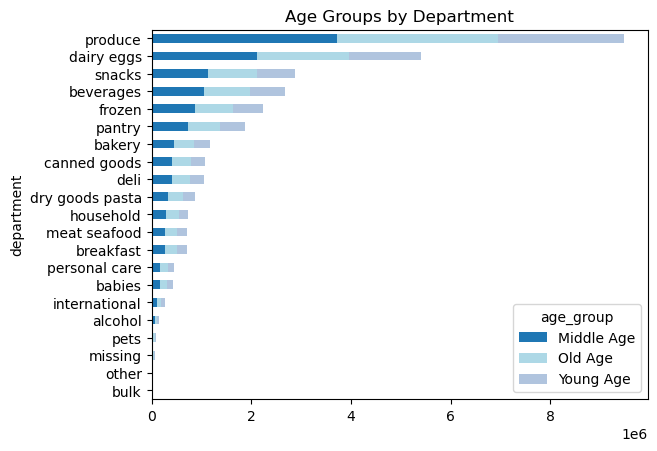

In [55]:
# creating a visualization for the above crosstab

age_dept_viz=age_dept.plot.barh(title='Age Groups by Department',color=['tab:blue','lightblue','lightsteelblue'],stacked=True)

In [56]:
# exporting the above visualization

age_dept_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_dept.png'),bbox_inches='tight')

In [128]:
# creating a crosstab between 'age_group' and 'price_range_loc'

age_price_range=pd.crosstab(df_latest_all['price_range_loc'],df_latest_all['age_group'],dropna=False)

In [129]:
age_price_range

age_group,Middle Age,Old Age,Young Age
price_range_loc,,,
High-range product,163298,143516,110864
Low-range product,3972310,3456614,2697397
Mid-range product,8574341,7467125,5819394


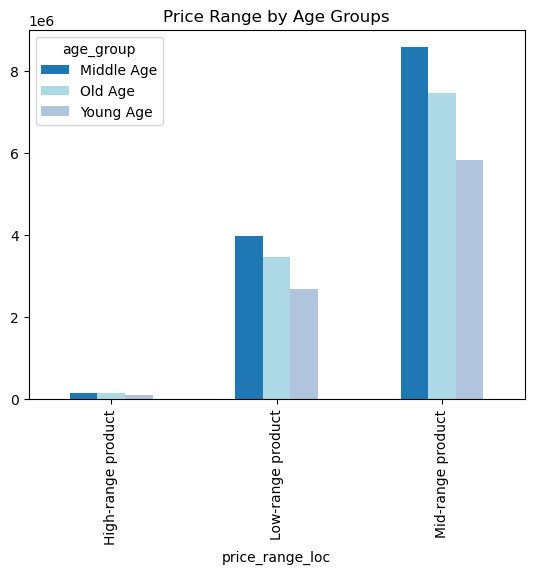

In [130]:
# creating a visualization for 'age_price_range' crosstab

age_price_range_viz=age_price_range.plot.bar(title='Price Range by Age Groups',color=['tab:blue','lightblue','lightsteelblue'])

In [131]:
# exporting the above visualization

age_price_range_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_price_range.png'),bbox_inches='tight')

## 07. Customer Profiling based on INCOME

In [57]:
df_latest_all['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [58]:
# creating a flag as per income groups

df_latest_all.loc[(df_latest_all['income']>=25000)&(df_latest_all['income']<75000),'Income_Groups']= 'Low Income'

In [59]:
df_latest_all.loc[(df_latest_all['income']>=75000)&(df_latest_all['income']<150000),'Income_Groups']= 'Medium Income'

In [60]:
df_latest_all.loc[(df_latest_all['income']>=150000),'Income_Groups']= 'High Income'

In [61]:
# checking the result

df_latest_all['Income_Groups'].value_counts(dropna=False)

Medium Income    17910512
Low Income       10442766
High Income       4051581
Name: Income_Groups, dtype: int64

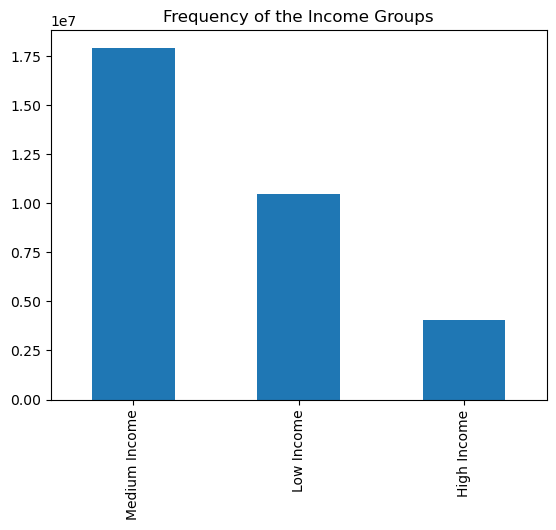

In [62]:
# creating a visualization of the 'Income_Groups' column

income_groups_bar=df_latest_all['Income_Groups'].value_counts().plot.bar(title='Frequency of the Income Groups')

In [63]:
# exporting the visualization

income_groups_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_groups_bar.png'),bbox_inches='tight')

In [64]:
# checking the 'Income_Groups' with 'region'

income_region=pd.crosstab(df_latest_all['region'],df_latest_all['Income_Groups'],dropna=False)

In [65]:
income_region

Income_Groups,High Income,Low Income,Medium Income
region,,,
Midwest,872495,2227147,3866755
Northeast,706788,1822149,3193799
South,1499535,3898323,6660220
West,972763,2495147,4189738


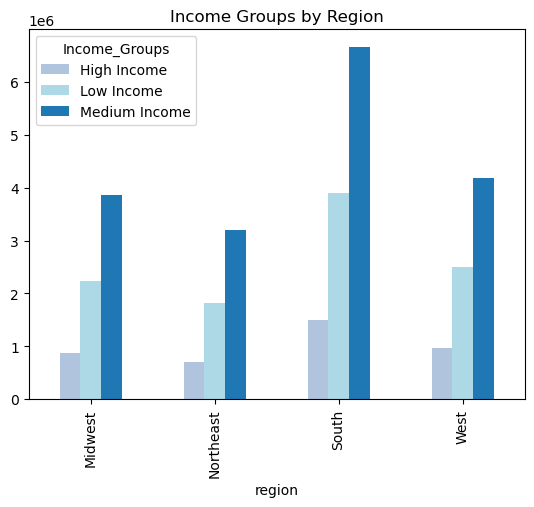

In [66]:
# creating a visualization for the above 'income_region' crosstab

income_region_viz=income_region.plot.bar(title='Income Groups by Region',color=['lightsteelblue','lightblue','tab:blue'])

In [67]:
# exporting the above visualization

income_region_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_region.png'),bbox_inches='tight')

In [68]:
# checking the 'Income_Groups' with 'order_frequency_flag'

income_order_freq=pd.crosstab(df_latest_all['order_frequency_flag'],df_latest_all['Income_Groups'],dropna=False)

In [69]:
income_order_freq

Income_Groups,High Income,Low Income,Medium Income
order_frequency_flag,,,
Frequent customer,2738539,6857561,11963753
Non-frequent customer,424322,1264268,1947852
Regular customer,888720,2320937,3998907


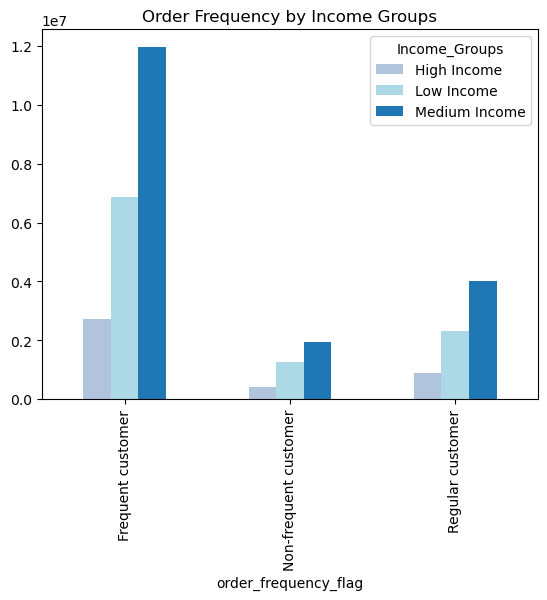

In [70]:
# creating a visualization of the above 'income_order_freq' crosstab

income_order_freq_viz=income_order_freq.plot.bar(title='Order Frequency by Income Groups', color=['lightsteelblue','lightblue','tab:blue'])

In [127]:
# exporting the above visualization

income_order_freq_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_order_freq.png'),bbox_inches='tight')

In [72]:
# checking the 'Income_Groups' with 'spending_flag'

income_spending=pd.crosstab(df_latest_all['spending_flag'],df_latest_all['Income_Groups'],dropna=False)

In [73]:
income_spending

Income_Groups,High Income,Low Income,Medium Income
spending_flag,,,
High spender,397954,35655,200636
Low spender,3653627,10407111,17709876


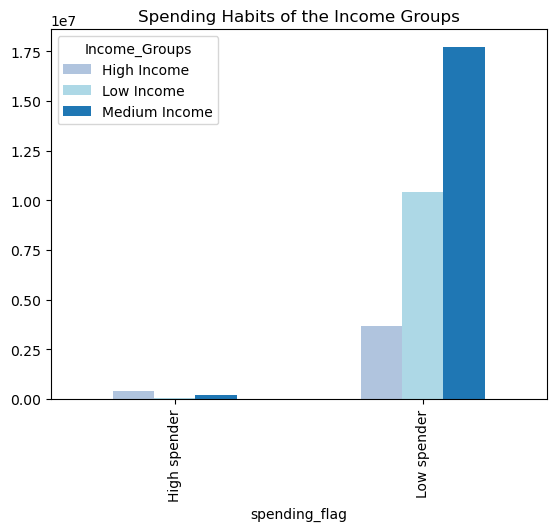

In [74]:
# creating a visualization of the 'income_spending' crosstab

income_spending_viz=income_spending.plot.bar(title='Spending Habits of the Income Groups',color=['lightsteelblue','lightblue','tab:blue'])

In [75]:
# exporting the above visualization

income_spending_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_spending.png'),bbox_inches='tight')

In [76]:
# checking the 'age_group' with the 'Income_Groups'

age_income=pd.crosstab(df_latest_all['age_group'],df_latest_all['Income_Groups'],dropna=False)

In [77]:
age_income

Income_Groups,High Income,Low Income,Medium Income
age_group,,,
Middle Age,1883557,3408662,7417730
Old Age,2091236,1722730,7253289
Young Age,76788,5311374,3239493


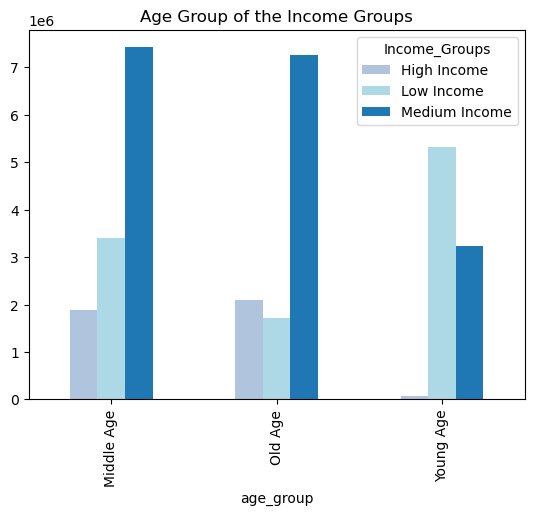

In [78]:
# creating a visualization of the 'age_income' crosstab

age_income_viz=age_income.plot.bar(title='Age Group of the Income Groups',color=['lightsteelblue','lightblue','tab:blue'])

In [79]:
# exporting the above visualization

age_income_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_income.png'),bbox_inches='tight')

In [80]:
# checking the 'Income_Groups' with 'department'

income_dept=pd.crosstab(df_latest_all['department'],df_latest_all['Income_Groups'],dropna=False)

In [81]:
income_dept

Income_Groups,High Income,Low Income,Medium Income
department,,,
alcohol,24953,48180,80563
babies,54433,119538,249831
bakery,154054,360332,658042
beverages,325147,958035,1404941
breakfast,86857,245791,370385
bulk,3773,12369,18431
canned goods,138758,314806,614494
dairy eggs,684341,1680064,3034342
deli,131002,336307,583940


In [82]:
income_dept= income_dept.sort_values(by=['Medium Income'], ascending=True)

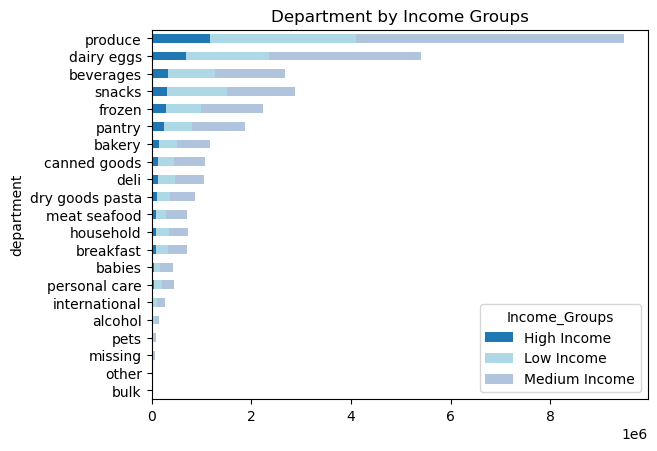

In [83]:
# creating a visualization of the 'income_dept' crosstab

income_dept_viz=income_dept.plot.barh(title='Department by Income Groups',color=['tab:blue','lightblue','lightsteelblue'],stacked=True)

In [84]:
# Exporting the above visualization

income_dept_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_dept.png'),bbox_inches='tight')

In [134]:
# creating a crosstab between 'Income_Groups' and 'price_range_loc'

income_price_range=pd.crosstab(df_latest_all['price_range_loc'],df_latest_all['Income_Groups'],dropna=False)

In [135]:
income_price_range

Income_Groups,High Income,Low Income,Medium Income
price_range_loc,,,
High-range product,59799,106263,251616
Low-range product,1206685,3607938,5311698
Mid-range product,2785097,6728565,12347198


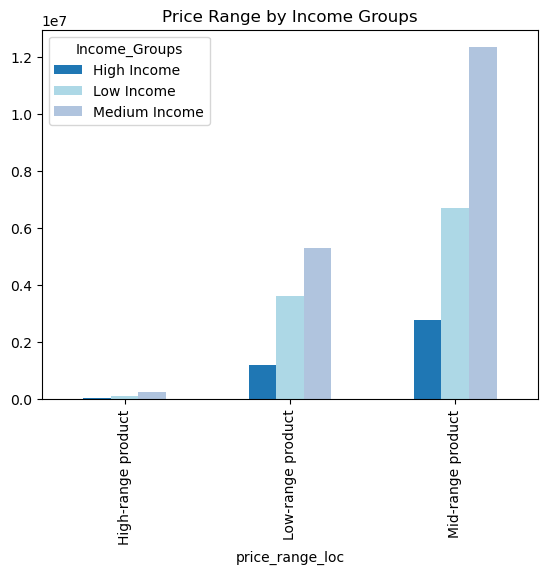

In [136]:
# creating a visualization of 'income_price_range'

income_price_range_viz=income_price_range.plot.bar(title='Price Range by Income Groups',color=['tab:blue','lightblue','lightsteelblue'])

In [137]:
# exporting the above visualization

income_price_range_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_price_range.png'),bbox_inches='tight')

## 08. Customer Profiling based on 'CANNED GOODS' users

In [85]:
# creating a flag to profile 'canned goods' users vs 'canned good' non-users

df_latest_all.loc[df_latest_all['department_id']==15,'canned_goods_customers']='Canned Goods user'

In [86]:
df_latest_all.loc[df_latest_all['department_id']!=15, 'canned_goods_customers']='Canned Goods Non-user'

In [87]:
# To identify customers who are canned goods users we need the user_id column's information

latest_canned_goods_columns = df_latest_all.loc[df_latest_all['canned_goods_customers'] == 'Canned Goods user', 'user_id'].unique()

In [88]:
# Updating the "canned_goods_customers" column

df_latest_all.loc[df_latest_all['user_id'].isin(latest_canned_goods_columns), 'canned_goods_customers'] = 'Canned Goods user'

In [89]:
df_latest_all['canned_goods_customers'].value_counts(dropna=False)

Canned Goods user        27094927
Canned Goods Non-user     5309932
Name: canned_goods_customers, dtype: int64

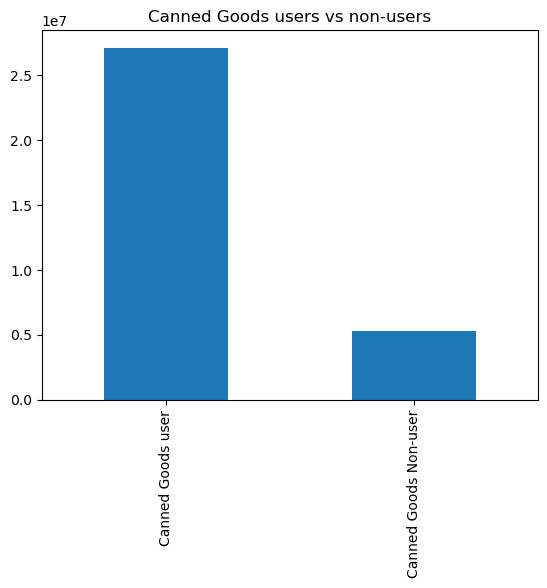

In [90]:
# creating a visualization of the 'canned goods_customers' column

canned_goods_viz=df_latest_all['canned_goods_customers'].value_counts().plot.bar(title='Canned Goods users vs non-users')

In [91]:
# exporting the above visualization

canned_goods_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','canned_goods_users.png'),bbox_inches='tight')

In [92]:
# creating a crosstab between 'canned_goods_customers' and 'region'

canned_goods_region=pd.crosstab(df_latest_all['region'],df_latest_all['canned_goods_customers'],dropna=False)

In [93]:
canned_goods_region

canned_goods_customers,Canned Goods Non-user,Canned Goods user
region,,
Midwest,1156505,5809892
Northeast,932636,4790100
South,1961087,10096991
West,1259704,6397944


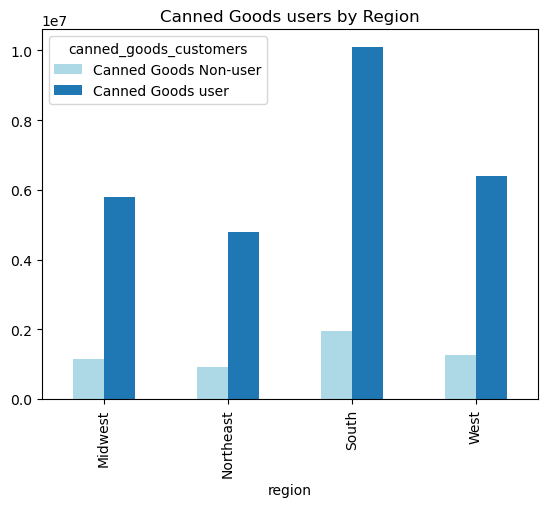

In [94]:
# creating a visualization of the 'canned_goods_region' crosstab

canned_goods_region_viz=canned_goods_region.plot.bar(title='Canned Goods users by Region',color=['lightblue','tab:blue'])

In [95]:
# exporting the above visualization

canned_goods_region_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','canned_goods_region.png'),bbox_inches='tight')

In [96]:
# creating a crosstab between 'canned_goods_customers' and 'order_frequency_flag'

canned_order_freq=pd.crosstab(df_latest_all['order_frequency_flag'],df_latest_all['canned_goods_customers'],dropna=False)

In [97]:
canned_order_freq

canned_goods_customers,Canned Goods Non-user,Canned Goods user
order_frequency_flag,,
Frequent customer,3034540,18525313
Non-frequent customer,973563,2662879
Regular customer,1301829,5906735


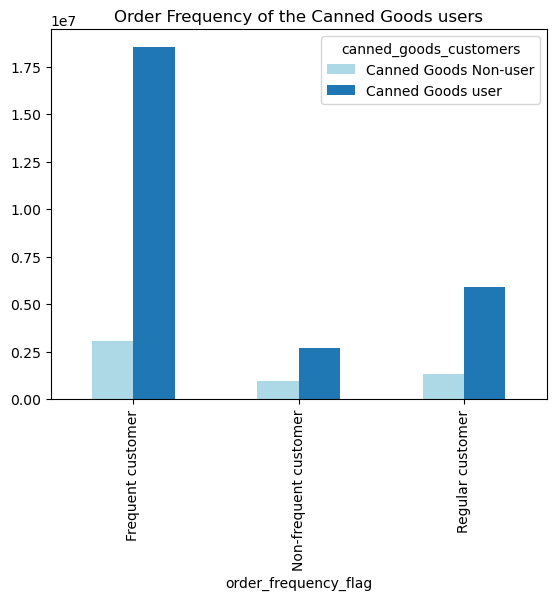

In [98]:
# creating a visualization of the above crosstab

canned_order_freq_viz=canned_order_freq.plot.bar(title='Order Frequency of the Canned Goods users',color=['lightblue','tab:blue'])

In [99]:
# exporting the above visualization

canned_order_freq_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','canned_order_frequency.png'),bbox_inches='tight')

In [100]:
# checking the canned_goods users by age

canned_good_age=pd.crosstab(df_latest_all['age_group'],df_latest_all['canned_goods_customers'],dropna=False)

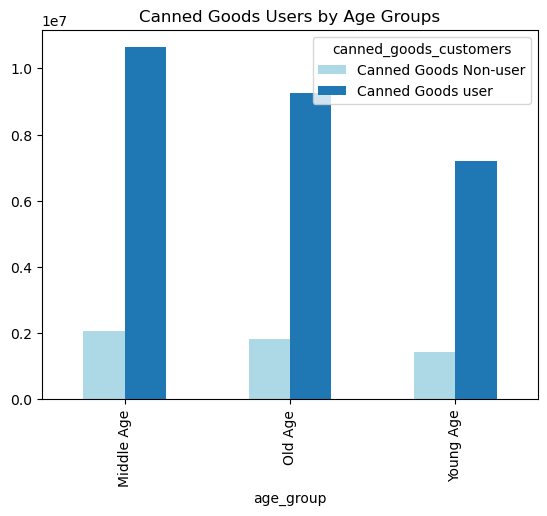

In [101]:
# creating a visualization of the above crosstab

canned_good_age_viz=canned_good_age.plot.bar(title='Canned Goods Users by Age Groups',color=['lightblue','tab:blue'])

In [102]:
# exporting the above visualization

canned_good_age_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','canned_good_age.png'),bbox_inches='tight')

In [103]:
# checking the 'canned_goods_customers' with the 'Income_Groups'

canned_good_income=pd.crosstab(df_latest_all['Income_Groups'],df_latest_all['canned_goods_customers'],dropna=False)

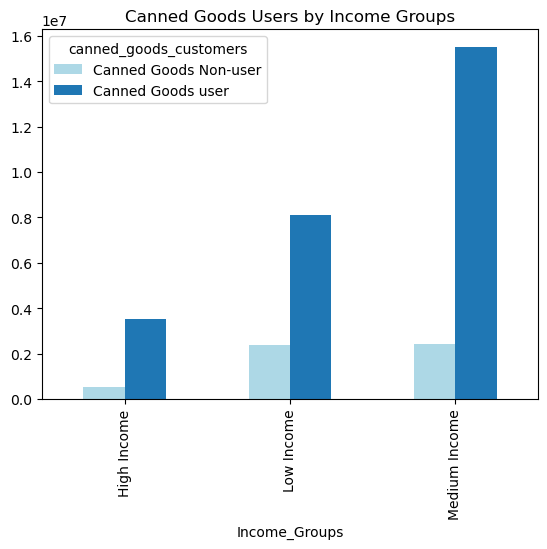

In [104]:
# creating a visualization of the above crosstab

canned_good_income_viz=canned_good_income.plot.bar(title='Canned Goods Users by Income Groups',color=['lightblue','tab:blue'])

In [105]:
# exporting the above visualization

canned_good_income_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','canned_good_income.png'),bbox_inches='tight')

In [138]:
# creating a crosstab between 'canned_goods_customers' and 'price_range_loc'

canned_price_range=pd.crosstab(df_latest_all['price_range_loc'],df_latest_all['canned_goods_customers'],dropna=False)

In [139]:
canned_price_range

canned_goods_customers,Canned Goods Non-user,Canned Goods user
price_range_loc,,
High-range product,44845,372833
Low-range product,1785210,8341111
Mid-range product,3479877,18380983


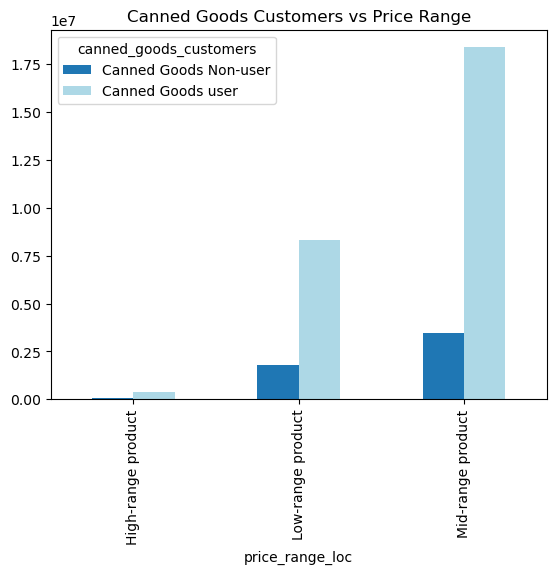

In [140]:
# creating a visualization of 'canned_price_range'

canned_price_range_viz=canned_price_range.plot.bar(title='Canned Goods Customers vs Price Range',color=['tab:blue','lightblue','lightsteelblue'])

In [142]:
# exporting the above visualization

canned_price_range_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','canned_price_range.png'),bbox_inches='tight')

## 09. Customer profiling based on NUMBER OF DEPENDANTS

In [106]:
# creating a flag based on the number of dependants

df_latest_all.loc[(df_latest_all['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_latest_all['no_of_dependants']==0), 'Family_Status_Flag'] = 'Single with NO Dependants'

In [107]:
df_latest_all.loc[(df_latest_all['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_latest_all['no_of_dependants'] >=1), 'Family_Status_Flag'] = 'Single WITH Dependants'

In [108]:
df_latest_all.loc[(df_latest_all['fam_status'] == 'married') & (df_latest_all['no_of_dependants'] == 1), 'Family_Status_Flag'] = 'Married with NO Dependants'

In [109]:
df_latest_all.loc[(df_latest_all['fam_status'] == 'married') & (df_latest_all['no_of_dependants'] > 1), 'Family_Status_Flag'] = 'Married WITH Dependants'

In [110]:
# checking the frequency of the flag

df_latest_all['Family_Status_Flag'].value_counts(dropna=False)

Married WITH Dependants       15205849
Single with NO Dependants      8097503
Married with NO Dependants     7550904
Single WITH Dependants         1550603
Name: Family_Status_Flag, dtype: int64

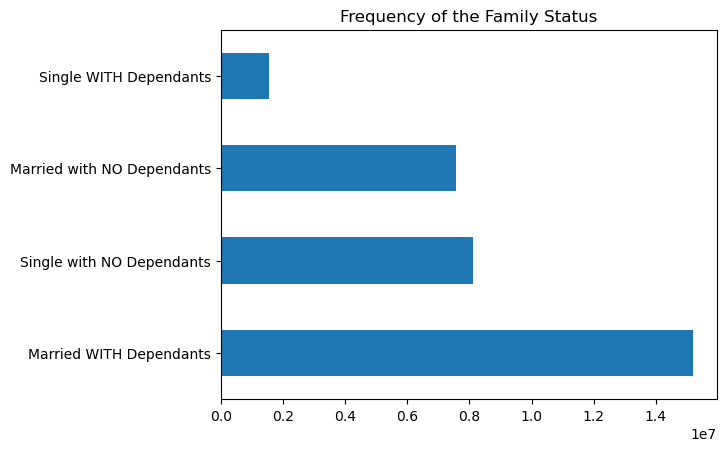

In [111]:
# creating a visualization of the 'Family_Status_Flag'

family_status_viz=df_latest_all['Family_Status_Flag'].value_counts().plot.barh(title='Frequency of the Family Status')

In [112]:
# exporting the above visualization

family_status_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_status.png'),bbox_inches='tight')

In [113]:
# checking the 'Family_Status_Flag' with 'region'

family_status_region=pd.crosstab(df_latest_all['region'],df_latest_all['Family_Status_Flag'],dropna=False)

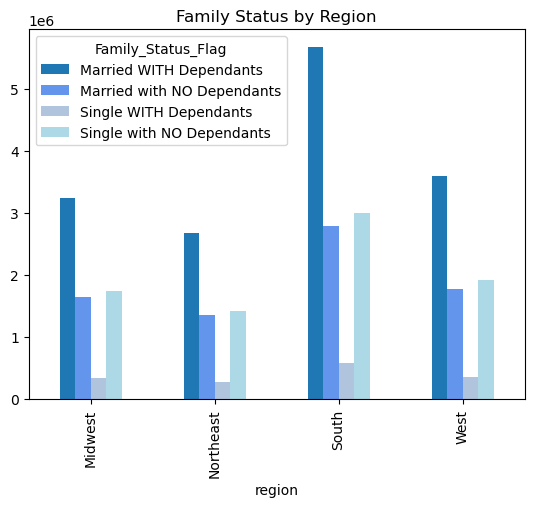

In [114]:
# creating the above visualization

family_status_region_viz=family_status_region.plot.bar(title='Family Status by Region',color=['tab:blue','cornflowerblue','lightsteelblue','lightblue'])

In [115]:
# exporting the above visualization

family_status_region_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_status_region.png'),bbox_inches='tight')

In [116]:
# checking the 'Family_Status_Flag' with 'spending_flag'

family_status_spending=pd.crosstab(df_latest_all['spending_flag'],df_latest_all['Family_Status_Flag'],dropna=False)

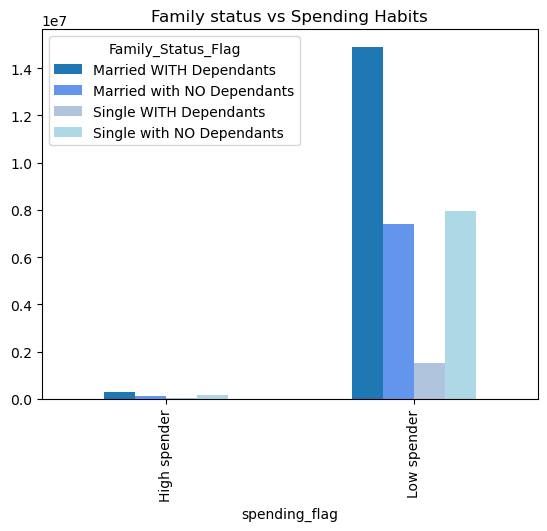

In [117]:
# creating a visualization for the 'family_status_spending' crosstab

family_status_spending_viz=family_status_spending.plot.bar(title='Family status vs Spending Habits',color=['tab:blue','cornflowerblue','lightsteelblue','lightblue'])

In [118]:
# exporting the above visualization

family_status_spending_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_status_spending.png'),bbox_inches='tight')

In [119]:
# checking the 'Family_Status_Flag' with 'order_hour_of_day'

family_status_hour=pd.crosstab(df_latest_all['order_hour_of_day'],df_latest_all['Family_Status_Flag'],dropna=False)

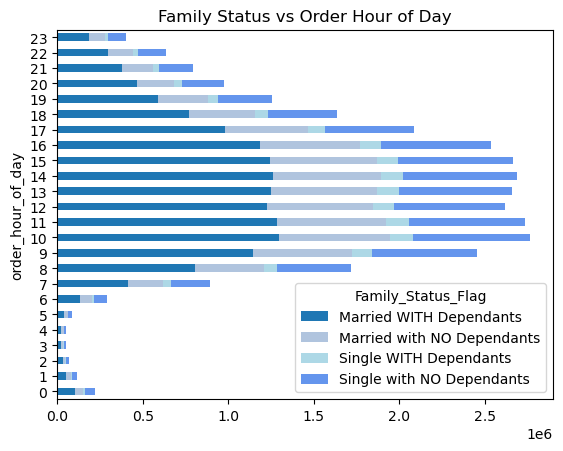

In [120]:
# creating the 'family_status_hour' visualization

family_status_hour_viz=family_status_hour.plot.barh(stacked=True,title='Family Status vs Order Hour of Day',color=['tab:blue','lightsteelblue','lightblue','cornflowerblue'])

In [121]:
# exporting the above visualization

family_status_hour_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_status_hour.png'),bbox_inches='tight')

In [122]:
# checking the 'Family_Status_Flag' with 'department'

family_status_department=pd.crosstab(df_latest_all['department'],df_latest_all['Family_Status_Flag'],dropna=False)

In [123]:
family_status_department=family_status_department.sort_values(by=['Married WITH Dependants'], ascending=True)

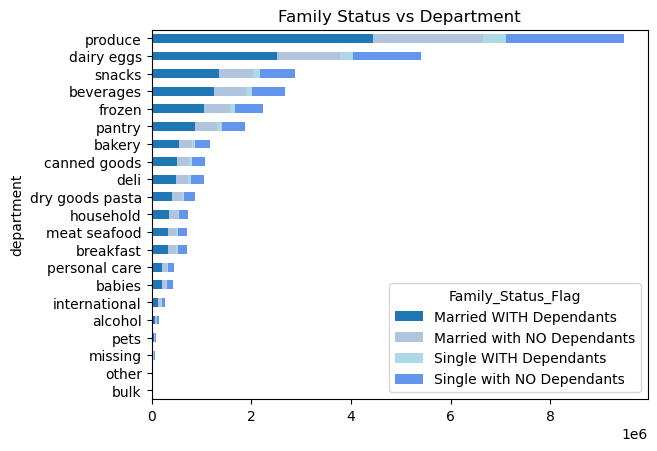

In [124]:
# creating the visualization of 'family_status_department'

family_status_department_viz=family_status_department.plot.barh(stacked=True,title='Family Status vs Department',color=['tab:blue','lightsteelblue','lightblue','cornflowerblue'])

In [125]:
# exporting the above visualization

family_status_department_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_status_dept.png'),bbox_inches='tight')

In [143]:
# creating a crosstab between 'Family_Status_Flag' and 'price_range_loc'

fam_status_price_range=pd.crosstab(df_latest_all['price_range_loc'],df_latest_all['Family_Status_Flag'],dropna=False)

In [144]:
fam_status_price_range

Family_Status_Flag,Married WITH Dependants,Married with NO Dependants,Single WITH Dependants,Single with NO Dependants
price_range_loc,,,,
High-range product,197790,97743,19968,102177
Low-range product,4755666,2355870,483461,2531324
Mid-range product,10252393,5097291,1047174,5464002


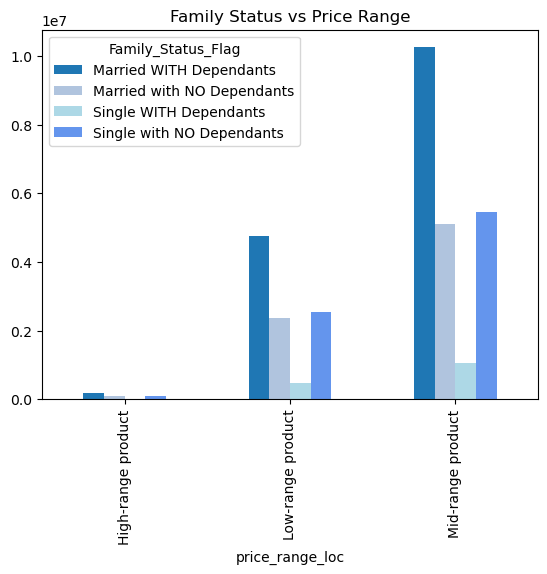

In [145]:
# creating a visualization for the above crosstab

fam_status_price_range_viz=fam_status_price_range.plot.bar(title='Family Status vs Price Range',color=['tab:blue','lightsteelblue','lightblue','cornflowerblue'])

In [146]:
# exporting the above visualization

fam_status_price_range_viz.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','fam_status_price_range.png'),bbox_inches='tight')

## Exporting the final Dataframe

In [126]:
df_latest_all.to_pickle(os.path.join(path,'02 Data','Prepared Data','final_dataset.pkl'))